In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


### **Problem Statment**
#### Build a prediction model for Salary_hike

### **Business Statment**
#### Develop a simple linear regression model for predicting salary hike.

In [ ]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## ***Data acquisition***

In [ ]:
#Import
df = pd.read_csv('drive/MyDrive/Rohith/Assignments/Simple_Linear_regression/Salary_Data.csv')
print(df.head())


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


# **Exploratory Data Analysis** 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


1. Data has only float and integer values.
2. No variable column has null/missing values

In [ ]:
print('Sum of duplicated values :',df.duplicated().sum())

Sum of duplicated values : 0


No duplicate values in data.
#### Summary statistics

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000



#### Data Visualization

Correlation : 
                  YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000 



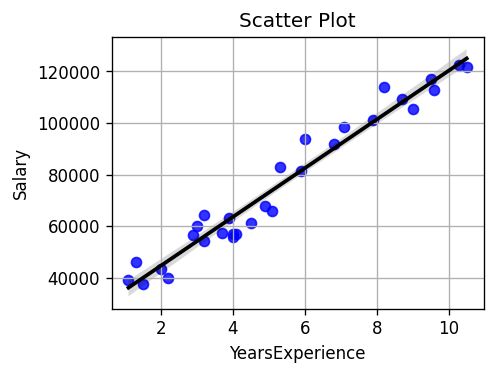

In [ ]:
plt.rcParams["figure.dpi"] = 120
plt.figure(figsize=(4,3))
Correlation_matrix = sns.regplot(x=df['YearsExperience'],y=df['Salary'],ci=90,
                                 scatter_kws = {'color':'blue'} ,line_kws={'color': 'black'} )
plt.title('Scatter Plot')
plt.grid()

print('Correlation :','\n',df.corr(),'\n')

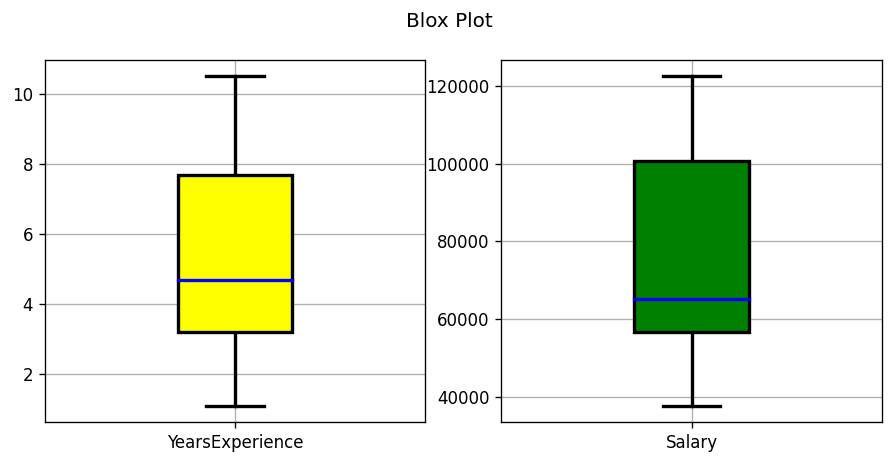

In [ ]:
plt.rcParams["figure.dpi"] = 120
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
box1=plt.boxplot(df['YearsExperience'],patch_artist=True,labels=['YearsExperience'],widths = 0.3,vert =1,
                 whiskerprops=dict(color="black",linewidth = 2),
                 boxprops={"facecolor": "yellow", "edgecolor": "black","linewidth": 2},
                 capprops={"color": "black", "linewidth": 2},
                 medianprops={"color": "blue", "linewidth": 2}
                 )
plt.grid()

plt.subplot(1,2,2)
box2=plt.boxplot(df['Salary'],patch_artist=True,labels=['Salary'],vert =True,widths = 0.3,
                 whiskerprops=dict(color="black",linewidth = 2),
                 boxprops={"facecolor": "green", "edgecolor": "black","linewidth": 2},
                 capprops={"color": "black", "linewidth": 2},
                 medianprops={"color": "blue", "linewidth": 2}
                 )
plt.suptitle('Blox Plot')
plt.grid()
plt.show()

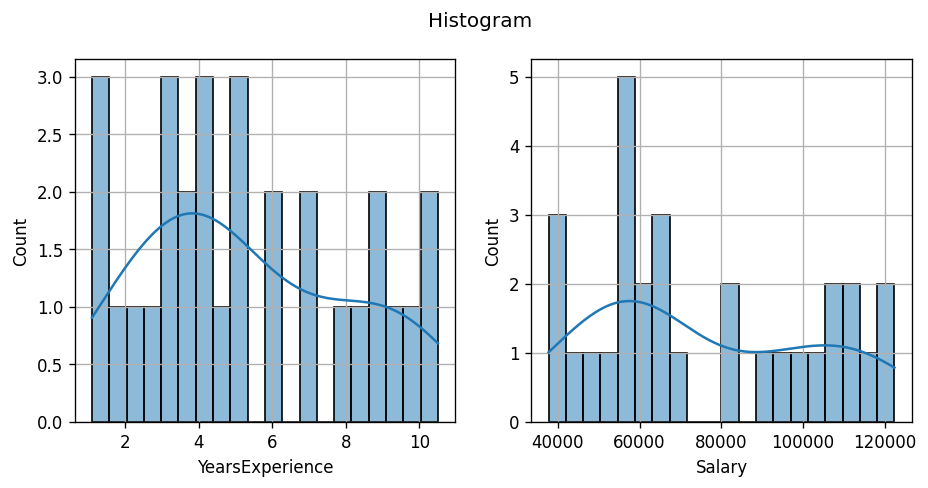

In [ ]:
plt.rcParams["figure.dpi"] = 120
plt.figure(figsize=(9,4))
plt.subplot(1,2,1) 
sns.histplot(df['YearsExperience'],kde=True,bins=20,);plt.grid()
plt.subplot(1,2,2) 
sns.histplot(df['Salary'],kde=True,bins=20,);plt.grid()
plt.suptitle('Histogram')
plt.show()

From the graphs we get:
1. No outlier or extreme values.
2. YearsExperience  : Left skewed distribution
3. Salary : left skewed distribution

# Data Cleaning

Since no null values, duplicated values and no outliers are present, we can skip Data cleaning.




In [ ]:
x= df[['YearsExperience']];y=df[['Salary']] 

# Data Transformation
Scince the x-varible 'YearsExperience' is left skewed distribution, we use common transformations include square root, cube root, and log.


Skewness of x-varible                               :  YearsExperience    0.37956
dtype: float64
Skewness of x-varible for Square root transormation :  YearsExperience   -0.049196
dtype: float64
Skewness of x-varible for Cube root transormation   :  YearsExperience   -0.220111
dtype: float64
Skewness of x-varible for Log transormation         :  YearsExperience   -0.600565
dtype: float64 





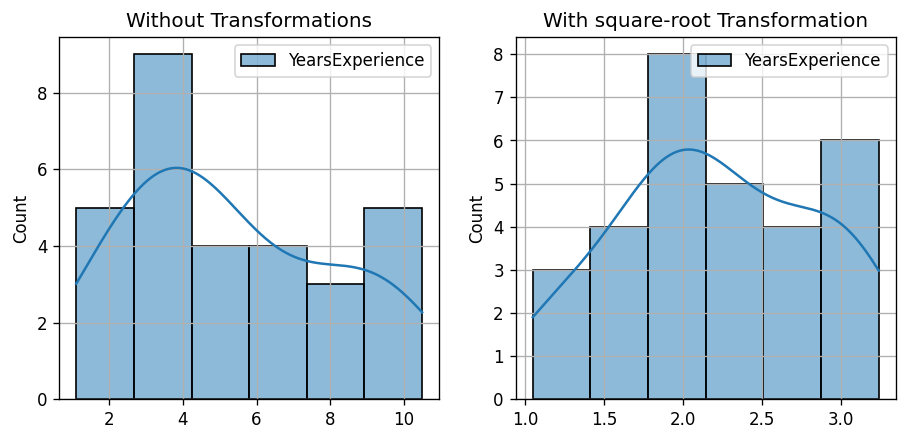

In [ ]:
#Square root transormation
sq_trans_x = np.sqrt(x)
#Cube root transformation
cb_trans_x = np.cbrt(x)
# Log transformation
log_trans_x = np.log(x)

# Difference in skewness between the orginal data and transformed data
x_skew = x.skew()
print('Skewness of x-varible                               : ',x_skew)
print('Skewness of x-varible for Square root transormation : ',sq_trans_x.skew())
print('Skewness of x-varible for Cube root transormation   : ',cb_trans_x.skew())
print('Skewness of x-varible for Log transormation         : ',log_trans_x.skew(),'\n'*3)


plt.rcParams["figure.dpi"] = 120
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.histplot(x,kde=True,color = 'C0', ec="black", lw=1);plt.grid()
plt.gca().title.set_text('Without Transformations')
plt.subplot(1,2,2)
sns.histplot(sq_trans_x,kde=True,color ="blue", ec="black", lw=1);plt.grid()
plt.gca().title.set_text('With square-root Transformation')
plt.show()

Inference:
1. From above data we can see data have positve skewness.
2. The data with sqaure-root transformation has least skewness i.e., -0.049

So, we can use sqaure-root transformation for model selection

Skewness of y-varible                               :  Salary    0.35412
dtype: float64
Skewness of y-varible for Square root transormation :  Salary    0.169043
dtype: float64
Skewness of y-varible for Cube root transormation   :  Salary    0.10121
dtype: float64
Skewness of y-varible for Log transormation         :  Salary   -0.044126
dtype: float64 





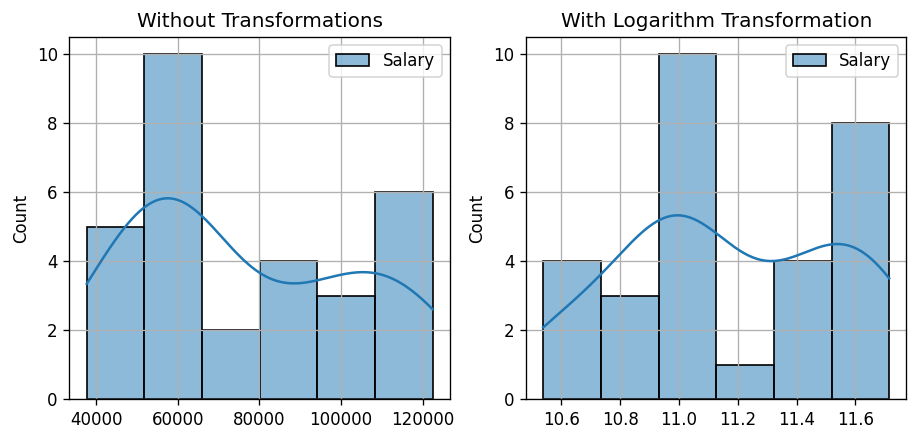

In [ ]:
#Square root transormation
sq_trans_y = np.sqrt(y)
#Cube root transformation
cb_trans_y = np.cbrt(y)
# Log transformation
log_trans_y = np.log(y)

# Difference in skewness between the orginal data and transformed data
y_skew = y.skew()
print('Skewness of y-varible                               : ',y_skew)
print('Skewness of y-varible for Square root transormation : ',sq_trans_y.skew())
print('Skewness of y-varible for Cube root transormation   : ',cb_trans_y.skew())
print('Skewness of y-varible for Log transormation         : ',log_trans_y.skew(),'\n'*3)


plt.rcParams["figure.dpi"] = 120
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.histplot(y,kde=True,color = "blue", ec="black", lw=1);plt.grid()
plt.gca().title.set_text('Without Transformations')
plt.subplot(1,2,2)
sns.histplot(log_trans_y,kde=True,color ="blue", ec="black", lw=1);plt.grid()
plt.gca().title.set_text('With Logarithm Transformation')
plt.show()

Inference:
1. From above data we can see data have positve skewness.
2. The data with logarthimic transformation has least skewness i.e., -0.044

So, we can use logarthimic transformation for model selection

In [ ]:
i=20
# Function for data partition and simple linear regression model
def Sim_lin_reg (x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = (i))
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    y_pred_train = LR.predict(x_train)
    y_pred_test = LR.predict(x_test)
    Coefficient.append(LR.coef_[0][0].round(3))
    Intercept.append(LR.intercept_[0].round(3))
    RMSE_train = np.sqrt(mean_squared_error(y_train,y_pred_train).round(2))
    Root_Mean_squared_error_train.append(RMSE_train.round(3))
    RMSE_test = np.sqrt(mean_squared_error(y_test,y_pred_test).round(3))
    Root_Mean_squared_error_test.append(RMSE_test.round(3))
    R2_score_Train.append(r2_score(y_train,y_pred_train).round(3))
    R2_score_Test.append(r2_score(y_test,y_pred_test).round(3))

# Model Selection
We use simple linear regression as there is only one independent varible. i.e., YearExperience

In [ ]:
LR = LinearRegression()
Root_Mean_squared_error_test = []
Root_Mean_squared_error_train = []
R2_score_Test = []
R2_score_Train = []
Coefficient =[]
Intercept =[]
Tranformations = ['NO_transformation','log(x)','square_root(x)','cubic_root(x)','square_root(x)&log(y)']
Root_Mean_squared_error_test.clear();Root_Mean_squared_error_train.clear()
R2_score_Test.clear();R2_score_Train.clear();Coefficient.clear();Intercept.clear()

In [ ]:
# Simple Linear regression without transformation
Sim_lin_reg(x,y)

#Simple Linear regression with log(x)
Sim_lin_reg(log_trans_x,y)

#Simple Linear regression with square root(x)
x3=np.sqrt(x);y3 =y
Sim_lin_reg(sq_trans_x,y)

#Simple Linear regression with cubic root(x)
x4=np.sqrt(x);y4 =y
Sim_lin_reg(cb_trans_x,y)

#Simple Linear regression with square_root(x) and log (y)
Sim_lin_reg(sq_trans_x,log_trans_y)
# Evaluating all models and Selecting Best Model

dict = {'Coefficient':Coefficient,
        'Intercept':Intercept,
        'Root_Mean_squared_error_test':Root_Mean_squared_error_test,
        'Root_Mean_squared_error_train':Root_Mean_squared_error_train,
        'R2_score_Test':R2_score_Test,
        'R2_score_Train':R2_score_Train}
df1 = pd.DataFrame(dict,index=Tranformations)
df1

,Coefficient,Intercept,Root_Mean_squared_error_test,Root_Mean_squared_error_train,R2_score_Test,R2_score_Train
NO_transformation,9492.521,26190.155,6360.695,5429.416,0.944,0.957
log(x),41303.083,14263.678,13585.752,9327.925,0.745,0.873
square_root(x),41826.742,-16349.383,9173.400,6473.395,0.884,0.939
cubic_root(x),79793.298,-58043.585,10558.456,7277.727,0.846,0.923
square_root(x)&log(y),0.567,9.924,0.122,0.100,0.882,0.953


Inference from dataframe

we have:
1. Least root mean square error for both test and train data in square_root(x)&log(y), and R2_score for test and train data is  88.2% , and 95.3% respectively.   
2. R2_score for test and train data is maximum with NON-transforamtion varibles, but has high  Root mean square error for both test and train data.


From the inference we can say square_root(x)&log(y) is best of all models

The required equation is 

" log('Salary') = [0.567 X sqrt('YearExperience')] + 9.924 "

In [ ]:
# Cross validation
#We use resampling method
Training_error = []
Test_error = []
R2_Train =[]
R2_Test = []
coefficient =[]
intercept =[]
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(sq_trans_x,log_trans_y,test_size=0.2,random_state = (i))
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    y_pred_train = LR.predict(x_train)
    y_pred_test = LR.predict(x_test)
    Training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)).round(2))
    Test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)).round(2))
    R2_Train.append(r2_score(y_train,y_pred_train).round(3))
    R2_Test.append(r2_score(y_test,y_pred_test).round(3))
    coefficient.append(LR.coef_.round(3))
    intercept.append(LR.intercept_.round(3))
    
    
print("validation set approach for Intercept     : ",np.mean(intercept).round(3))
print("validation set approach for Coefficent    : ",np.mean(coefficient).round(3))
print("validation set approach for Traning error : ",np.mean(Training_error).round(2))    
print("validation set approach for Test error    : ",np.mean(Test_error).round(2))
print("validation set approach for R2 Train      : ",np.mean(R2_Train).round(2)*100,'%')
print("validation set approach for R2 Test       : ",np.mean(R2_Test).round(2)*100,'%')

validation set approach for Intercept     :  9.93
validation set approach for Coefficent    :  0.561
validation set approach for Traning error :  0.09
validation set approach for Test error    :  0.09
validation set approach for R2 Train      :  94.0 %
validation set approach for R2 Test       :  91.0 %


The final equation for simple linear regression equation is :

" log('Salary') = [0.561 X sqrt("YearExperiance")] + 9.93 "

<function matplotlib.pyplot.show(*args, **kw)>

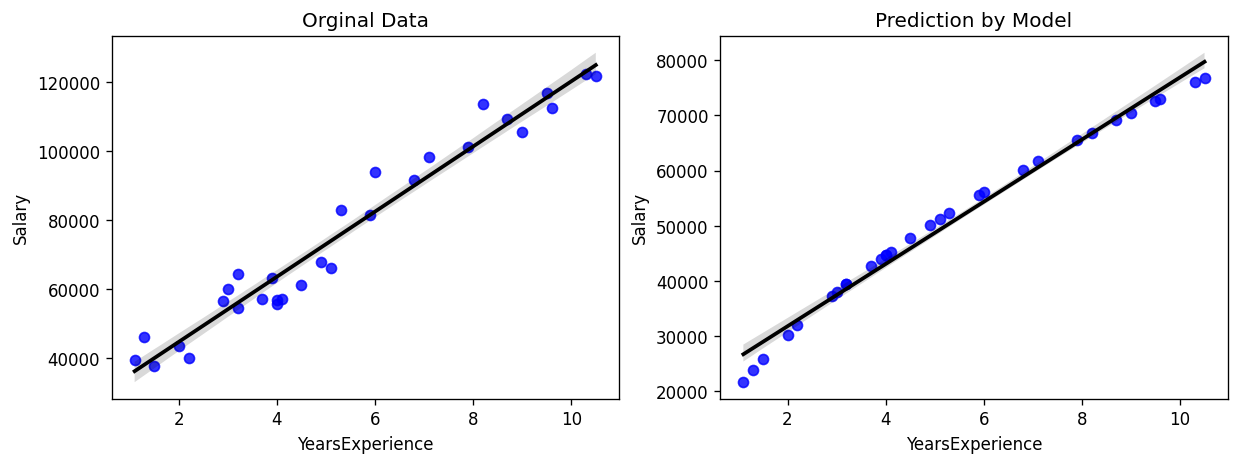

In [ ]:

x1=(x)
y1= np.exp(0.561*np.log(x1)+9.93)
y1.rename(columns={'YearsExperience':'Salary'},inplace=True)
plt.rcParams["figure.dpi"] = 120
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.gca().set_title('Orginal Data')
sns.regplot(x=x,y=y,ci=90,scatter_kws = {'color':'blue'} ,line_kws={'color': 'black'})
plt.subplot(1,2,2)
plt.gca().set_title('Prediction by Model')
sns.regplot(x=x1,y=y1,ci=90,scatter_kws = {'color':'blue'} ,line_kws={'color': 'black'})
plt.show



##Conclusion
From the cross validation we get required equation of simple linear regression

### log('Salary') = [0.561 X sqrt("YearExperiance")] + 9.93